Project Assignment - CO2 Emissions

1-What is the biggest predictor of a large CO2 output per capita of a country?

In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/User/Downloads/owid-co2-data(2).csv")

In [7]:
# There is no existing column for GDP per capita; it needs to be created first.

df['gdp_per_capita'] = df['gdp'] / df['population']

#This syntax is used to handle division-by-zero errors.
df.replace([np.inf, -np.inf], np.nan, inplace=True)


#Based on the question, I keep CO₂ emissions per capita as the dependent variable and create a list to evaluate other variables against the target variable
# to see which has the greatest impact.

dependent_variable = 'co2_per_capita'

independent_variables = [
    'gdp_per_capita', 'population', 'gdp', 'primary_energy_consumption',
    'energy_per_capita', 'methane_per_capita',
    'nitrous_oxide_per_capita', 'land_use_change_co2_per_capita'
]

# filter the master dataset to include only the target dependent variable and the chosen independent predictors

selected_columns = [dependent_variable] + independent_variables + ['iso_code', 'year']

# Using this copy method to avoid affecting the original DataFrame
df_regression = df[selected_columns].copy()


# All the data used in the analysis should be numeric
for variable in [dependent_variable] + independent_variables:
    df_regression[variable] = pd.to_numeric(df_regression[variable], errors='coerce')


#I run the regression and correlation analysis.First, I create an empty list to store the results.

results = []

# Loop through each country and run separate regressions for each independent variable.
# For each country, clean the data by removing missing values and skip regressions
# with too few observations or with zero variance in either the predictor or the target variable.

for iso_code in df_regression['iso_code'].unique():
    country_data = df_regression[df_regression['iso_code'] == iso_code].copy()
    for ind_var in independent_variables:
        xy_data = country_data[[ind_var, dependent_variable]].dropna()
        X = xy_data[ind_var].values
        y = xy_data[dependent_variable].values
        
        if len(X) < 5:            # If there are fewer than 5 observations, skip this regression
            continue
            
        if np.std(X) == 0 or np.std(y) == 0:  # skip zero variance
            continue

        r_value = np.corrcoef(X, y)[0,1]   # Calculate the correlation coefficient between X and y

        r_squared = r_value ** 2         #square r value to obtain the R-squared value.

# Store the regression results for each country and independent variable,
        
        results.append({
            'country': iso_code,
            'independent_variable': ind_var,
            'r_squared': r_squared,
            'n_observations': len(X) }) # Number of observations used to compute the result

#making a Data frame 
df_results = pd.DataFrame(results)

# For each country, find the independent variable with the highest R-squared value
# and create a new dataframe with only these strongest predictors.
          
idx = df_results.groupby('country')['r_squared'].idxmax()
df_strongest_per_country = df_results.loc[idx].reset_index(drop=True)

# Sort for readability
df_strongest_per_country = df_strongest_per_country.sort_values(by='r_squared', ascending=False)

# the final results which shows which variable is the biggest predictor of a large CO2 output per capita of each country
print(df_strongest_per_country[['country', 'independent_variable', 'r_squared', 'n_observations']].head(215))


    country            independent_variable  r_squared  n_observations
86      IND               energy_per_capita   0.998606              60
18      BGD      primary_energy_consumption   0.996712              60
195     TWN               energy_per_capita   0.995016              60
36      CHN               energy_per_capita   0.992219              60
205     VNM               energy_per_capita   0.989307              60
..      ...                             ...        ...             ...
109     LIE  land_use_change_co2_per_capita   0.248259              66
158     QAT      primary_energy_consumption   0.205367              60
171     SPM                      population   0.177356              75
29      BRN      primary_energy_consumption   0.113865              44
103     KWT        nitrous_oxide_per_capita   0.044126              79

[213 rows x 4 columns]


Finally, I created a bar chart to show how these strongest predictor variables are distributed across all countries.

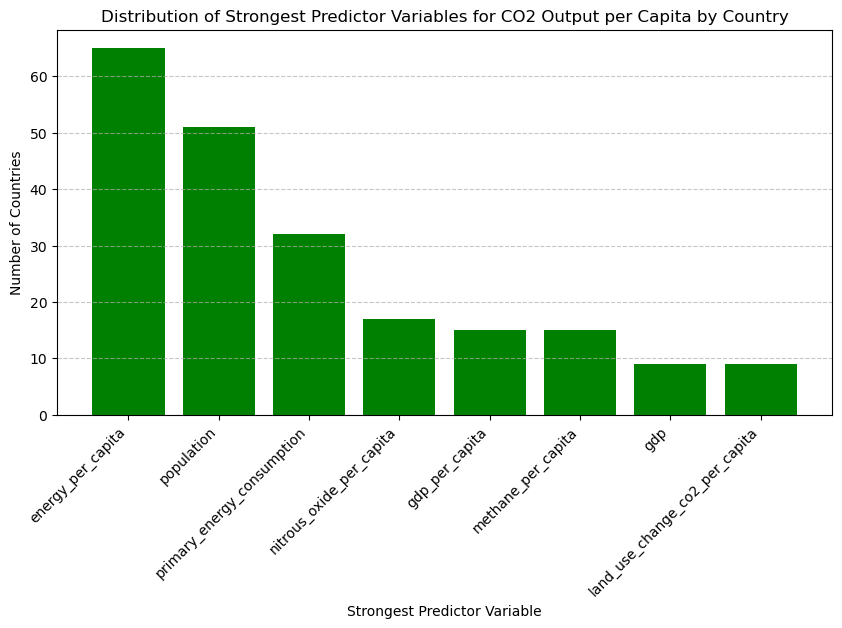

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each independent_variable
predictor_counts = df_strongest_per_country['independent_variable'].value_counts().reset_index()
predictor_counts.columns = ['independent_variable', 'num_countries']

# Create the bar chart using matplotlib.pyplot.bar
plt.figure(figsize=(10, 5))
plt.bar(predictor_counts['independent_variable'], predictor_counts['num_countries'], color='green')
plt.xlabel('Strongest Predictor Variable')
plt.ylabel('Number of Countries')
plt.title('Distribution of Strongest Predictor Variables for CO2 Output per Capita by Country')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()